# MAFS5360 Computing for Finance in Python

*Copyright © by Dr. Hongsong Chou, 2019 - 2023. No part of this material may be: (i) copied, photocopied, or duplicated in any form, by any means, or (ii) redistributed without prior expressed consent from the author. The views expressed here are those of the author himself and himself only.*

## Time Series Analysis in Python

A lot of quantitative research in finance is basically time series analysis. Through Pandas and Numpy, Python is equipped with rich features and functionalities for handling time series.

## What this notebook shows

1. Loading time series data files;
2. Manipulation of time series data (indexing, slicing, insertion, deletion, etc.);
3. Time series synchronization;
4. Statistical calculations;
5. Others.


### Prepare the notebook

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Loading time series data into Python via Pandas


In [122]:
stockDataFileName = '..//2330_md_201901_201903.csv.gz'
indexFuturesFileName = '..//TXF1_md_2019-01_2019-01.csv.gz'

stockData = pd.read_csv(stockDataFileName, compression='gzip', index_col=0)
futuresData = pd.read_csv(indexFuturesFileName, compression='gzip')

### Let's take a look at the two dataframes:

In [123]:
stockData

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
0,2019-01-02,90000984,22650.0,2390.0,2390,22850,22800,22750,22700,22650,...,250,466,250,273,2392,44,90,216,92,127
1,2019-01-02,90006003,22650.0,10.0,2400,22850,22800,22750,22700,22650,...,246,559,342,332,2974,80,101,212,195,233
2,2019-01-02,90011020,22600.0,38.0,2438,22850,22800,22750,22700,22650,...,246,560,342,331,3060,48,101,231,204,243
3,2019-01-02,90016041,22600.0,35.0,2473,22850,22800,22750,22700,22650,...,246,560,342,332,3043,14,111,231,204,244
4,2019-01-02,90021061,22600.0,21.0,2494,22800,22750,22700,22650,22600,...,560,1343,332,3045,3,123,235,206,244,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2019-03-29,132435975,24500.0,19.0,17115,24700,24650,24600,24550,24500,...,228,211,520,281,981,480,1779,723,788,651
3002,2019-03-29,132440994,24450.0,7.0,17122,24700,24650,24600,24550,24500,...,228,211,525,277,976,473,1779,723,788,651
3003,2019-03-29,132446014,24500.0,6.0,17128,24700,24650,24600,24550,24500,...,228,228,508,277,970,473,1779,723,787,651
3004,2019-03-29,132451032,24450.0,18.0,17146,24700,24650,24600,24550,24500,...,228,211,525,277,968,455,1779,723,787,651


In [124]:
futuresData

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize4,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol
0,2019-01-02,84500050,976400,976300,976200,976100,976000,975900,975800,975700,...,9,28,6,87,4,17,2,2,163,TXFA9
1,2019-01-02,84500066,976400,976300,976200,976100,976000,975800,975700,975600,...,9,29,6,78,13,2,2,164,2,TXFA9
2,2019-01-02,84500089,976300,976200,976100,976000,975900,975800,975700,975600,...,29,6,78,2,12,2,2,164,2,TXFA9
3,2019-01-02,84500109,976400,976300,976200,976100,976000,975800,975700,975600,...,9,29,6,78,6,2,2,164,2,TXFA9
4,2019-01-02,84500116,976300,976200,976100,976000,975900,975800,975700,975600,...,29,6,78,2,6,2,2,164,2,TXFA9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428163,2019-01-30,134459497,993100,993000,992900,992800,992700,992600,992500,992400,...,84,78,37,94,3,22,49,50,41,TXFB9
2428164,2019-01-30,134459623,993100,993000,992900,992800,992700,992600,992500,992400,...,84,78,37,93,3,22,49,50,41,TXFB9
2428165,2019-01-30,134459747,993100,993000,992900,992800,992700,992600,992500,992400,...,84,78,37,92,1,22,49,50,41,TXFB9
2428166,2019-01-30,134459872,993100,993000,992900,992800,992700,992500,992400,992300,...,84,78,37,90,22,49,51,41,25,TXFB9


In [125]:
stockData.columns

Index(['date', 'time', 'lastPx', 'size', 'volume', 'SP5', 'SP4', 'SP3', 'SP2',
       'SP1', 'BP1', 'BP2', 'BP3', 'BP4', 'BP5', 'SV5', 'SV4', 'SV3', 'SV2',
       'SV1', 'BV1', 'BV2', 'BV3', 'BV4', 'BV5'],
      dtype='object')

In [126]:
futuresData.columns

Index(['date', 'time', 'askPrice5', 'askPrice4', 'askPrice3', 'askPrice2',
       'askPrice1', 'bidPrice1', 'bidPrice2', 'bidPrice3', 'bidPrice4',
       'bidPrice5', 'askSize5', 'askSize4', 'askSize3', 'askSize2', 'askSize1',
       'bidSize1', 'bidSize2', 'bidSize3', 'bidSize4', 'bidSize5', 'symbol'],
      dtype='object')

### Let's just look at the first few and the last few rows

In [127]:
stockData.head(20)

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
0,2019-01-02,90000984,22650.0,2390.0,2390,22850,22800,22750,22700,22650,...,250,466,250,273,2392,44,90,216,92,127
1,2019-01-02,90006003,22650.0,10.0,2400,22850,22800,22750,22700,22650,...,246,559,342,332,2974,80,101,212,195,233
2,2019-01-02,90011020,22600.0,38.0,2438,22850,22800,22750,22700,22650,...,246,560,342,331,3060,48,101,231,204,243
3,2019-01-02,90016041,22600.0,35.0,2473,22850,22800,22750,22700,22650,...,246,560,342,332,3043,14,111,231,204,244
4,2019-01-02,90021061,22600.0,21.0,2494,22800,22750,22700,22650,22600,...,560,1343,332,3045,3,123,235,206,244,240
5,2019-01-02,90026080,22550.0,2.0,2496,22800,22750,22700,22650,22600,...,466,1343,1377,2918,64,128,248,206,246,230
6,2019-01-02,90031099,22550.0,39.0,2535,22800,22750,22700,22650,22600,...,469,1349,1451,3070,65,115,249,206,196,228
7,2019-01-02,90036118,22550.0,3.0,2538,22800,22750,22700,22650,22600,...,469,1347,1451,2891,256,113,250,206,196,228
8,2019-01-02,90041135,22550.0,27.0,2565,22800,22750,22700,22650,22600,...,469,1346,1450,2958,326,102,251,206,196,228
9,2019-01-02,90046153,22550.0,3.0,2568,22800,22750,22700,22650,22600,...,471,1344,1436,2969,341,103,250,206,227,228


In [128]:
futuresData.tail(20)

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize4,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol
2428148,2019-01-30,134456997,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,32,37,55,56,47,25,TXFB9
2428149,2019-01-30,134457122,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,32,36,55,56,47,25,TXFB9
2428150,2019-01-30,134457372,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,32,26,55,56,47,25,TXFB9
2428151,2019-01-30,134457497,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,32,25,55,56,47,25,TXFB9
2428152,2019-01-30,134457622,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,32,26,55,56,47,25,TXFB9
2428153,2019-01-30,134457872,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,31,26,55,56,47,25,TXFB9
2428154,2019-01-30,134457997,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,31,24,55,56,47,25,TXFB9
2428155,2019-01-30,134458122,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,31,23,55,56,47,25,TXFB9
2428156,2019-01-30,134458372,993000,992900,992800,992700,992600,992500,992400,992300,...,83,43,107,31,23,55,55,47,25,TXFB9
2428157,2019-01-30,134458497,993100,993000,992900,992800,992700,992500,992400,992300,...,83,83,43,106,22,55,55,47,25,TXFB9


In [129]:
stockData.tail(1)

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
3005,2019-03-29,132456052,24450.0,1.0,17147,24700,24650,24600,24550,24500,...,228,228,508,277,969,454,2278,723,787,651


In [130]:
stockData.describe()

,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,BP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
count,1.668920e+05,131587.000000,131587.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,...,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000,166892.000000
mean,1.101603e+08,22889.984953,9.698739,13693.728237,23138.157012,23088.157012,23038.157012,22988.157012,22938.157012,22888.100089,...,720.665772,926.737225,1182.113984,1369.755003,1028.478723,1111.143883,1315.023237,1003.032147,743.456439,660.697253
std,1.280018e+07,967.035455,65.787216,9400.005199,959.443327,959.443327,959.443327,959.443327,959.443327,959.443092,...,486.932794,663.620699,798.424263,847.794319,882.145310,1138.328340,929.567580,595.296848,427.524574,370.084718
min,9.000021e+07,20650.000000,1.000000,568.000000,20900.000000,20850.000000,20800.000000,20750.000000,20700.000000,20650.000000,...,24.000000,13.000000,23.000000,7.000000,1.000000,1.000000,3.000000,13.000000,13.000000,47.000000
25%,1.005249e+08,22050.000000,1.000000,7407.000000,22250.000000,22200.000000,22150.000000,22100.000000,22050.000000,22000.000000,...,358.000000,462.000000,563.000000,723.000000,357.000000,368.000000,586.000000,549.000000,467.000000,413.000000
50%,1.112186e+08,22950.000000,3.000000,11837.000000,23200.000000,23150.000000,23100.000000,23050.000000,23000.000000,22950.000000,...,592.000000,715.000000,1081.000000,1265.000000,793.000000,739.000000,1054.000000,848.000000,639.000000,567.000000
75%,1.219212e+08,23700.000000,6.000000,16706.250000,23950.000000,23900.000000,23850.000000,23800.000000,23750.000000,23650.000000,...,966.000000,1274.000000,1515.000000,1825.000000,1467.000000,1394.000000,1839.000000,1347.000000,852.000000,783.000000
max,1.324600e+08,24850.000000,11182.000000,67353.000000,25050.000000,25000.000000,24950.000000,24900.000000,24850.000000,24800.000000,...,6257.000000,6244.000000,6244.000000,5985.000000,6053.000000,7801.000000,7441.000000,4174.000000,3467.000000,2709.000000


### Handling NaN

In [131]:
#get a slice of the dataframe by row
stockData[5:15]  # No trade happen so there is a NaN

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
5,2019-01-02,90026080,22550.0,2.0,2496,22800,22750,22700,22650,22600,...,466,1343,1377,2918,64,128,248,206,246,230
6,2019-01-02,90031099,22550.0,39.0,2535,22800,22750,22700,22650,22600,...,469,1349,1451,3070,65,115,249,206,196,228
7,2019-01-02,90036118,22550.0,3.0,2538,22800,22750,22700,22650,22600,...,469,1347,1451,2891,256,113,250,206,196,228
8,2019-01-02,90041135,22550.0,27.0,2565,22800,22750,22700,22650,22600,...,469,1346,1450,2958,326,102,251,206,196,228
9,2019-01-02,90046153,22550.0,3.0,2568,22800,22750,22700,22650,22600,...,471,1344,1436,2969,341,103,250,206,227,228
10,2019-01-02,90051173,NaN,NaN,2568,22800,22750,22700,22650,22600,...,471,1344,1435,2970,342,103,250,206,227,228
11,2019-01-02,90056192,22600.0,2.0,2570,22800,22750,22700,22650,22600,...,472,1250,1435,3065,341,98,256,206,227,228
12,2019-01-02,90101212,22550.0,3.0,2573,22800,22750,22700,22650,22600,...,472,1250,1435,3085,340,90,264,208,228,228
13,2019-01-02,90106231,22600.0,6.0,2579,22800,22750,22700,22650,22600,...,473,1250,1437,3083,944,98,266,209,228,232
14,2019-01-02,90111251,22600.0,1.0,2580,22800,22750,22700,22650,22600,...,473,1250,1399,3113,1093,103,266,210,229,232


In [132]:
#get a slice of the dataframe by column
lastPrice = stockData['lastPx']

In [133]:
#Each column in a dataframe is a Pandas Series
type(lastPrice)

pandas.core.series.Series

In [134]:
#check how many NaN's lastPrice has
len(lastPrice), len(lastPrice[np.isnan(lastPrice)])

(166892, 35305)

In [135]:
#Conditional slicing of the dataFrame
lastPrice[np.isnan(lastPrice)]

10     NaN
22     NaN
26     NaN
35     NaN
53     NaN
        ..
2962   NaN
2966   NaN
2969   NaN
2976   NaN
2980   NaN
Name: lastPx, Length: 35305, dtype: float64

In [136]:
np.isnan(stockData['lastPx'])

0       False
1       False
2       False
3       False
4       False
        ...  
3001    False
3002    False
3003    False
3004    False
3005    False
Name: lastPx, Length: 166892, dtype: bool

In [137]:
#Another conditional slicing of the dataframe
stockData[stockData['date'] == '2019-02-25'].head(20)

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
0,2019-02-25,90001784,23750.0,914.0,914,23950,23900,23850,23800,23750,...,483,516,1033,537,32,131,343,314,313,1259
1,2019-02-25,90006792,23750.0,57.0,971,23950,23900,23850,23800,23750,...,479,516,1033,606,20,188,383,314,573,1519
2,2019-02-25,90011801,23750.0,10.0,981,23950,23900,23850,23800,23750,...,479,519,1035,613,13,194,383,315,575,1519
3,2019-02-25,90016812,23750.0,4.0,985,23950,23900,23850,23800,23750,...,479,519,1035,646,26,193,384,315,577,1519
4,2019-02-25,90021825,23750.0,17.0,1002,23950,23900,23850,23800,23750,...,479,519,1035,644,19,224,416,315,618,1519
5,2019-02-25,90026839,23750.0,9.0,1011,23950,23900,23850,23800,23750,...,480,519,1035,680,12,241,431,323,618,1519
6,2019-02-25,90031853,23750.0,7.0,1018,23950,23900,23850,23800,23750,...,480,519,1036,685,8,239,432,323,621,1519
7,2019-02-25,90036866,23750.0,4.0,1022,23950,23900,23850,23800,23750,...,482,519,1037,683,5,348,432,324,618,1520
8,2019-02-25,90041879,23750.0,7.0,1029,24000,23950,23900,23850,23800,...,422,483,520,1037,686,4,355,434,328,617
9,2019-02-25,90046894,23800.0,8.0,1037,24000,23950,23900,23850,23800,...,422,484,520,1107,753,159,247,410,320,605


In [138]:
#We want to forward-fill the NaNs in lastPx of stock data; 
#But, we need to be careful about the forward-filling;
#We don't want to forward fill one day's close price to the first price (if NaN) of next day.

#We first make a copy, then we forward fill
stockData_bkp = stockData.copy(deep=True)
stockData['lastPx']=stockData.groupby('date')['lastPx'].fillna(method='ffill')
stockData['size']=stockData.groupby('date')['size'].fillna(0)

In [139]:
stockData[5:17]

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
5,2019-01-02,90026080,22550.0,2.0,2496,22800,22750,22700,22650,22600,...,466,1343,1377,2918,64,128,248,206,246,230
6,2019-01-02,90031099,22550.0,39.0,2535,22800,22750,22700,22650,22600,...,469,1349,1451,3070,65,115,249,206,196,228
7,2019-01-02,90036118,22550.0,3.0,2538,22800,22750,22700,22650,22600,...,469,1347,1451,2891,256,113,250,206,196,228
8,2019-01-02,90041135,22550.0,27.0,2565,22800,22750,22700,22650,22600,...,469,1346,1450,2958,326,102,251,206,196,228
9,2019-01-02,90046153,22550.0,3.0,2568,22800,22750,22700,22650,22600,...,471,1344,1436,2969,341,103,250,206,227,228
10,2019-01-02,90051173,22550.0,0.0,2568,22800,22750,22700,22650,22600,...,471,1344,1435,2970,342,103,250,206,227,228
11,2019-01-02,90056192,22600.0,2.0,2570,22800,22750,22700,22650,22600,...,472,1250,1435,3065,341,98,256,206,227,228
12,2019-01-02,90101212,22550.0,3.0,2573,22800,22750,22700,22650,22600,...,472,1250,1435,3085,340,90,264,208,228,228
13,2019-01-02,90106231,22600.0,6.0,2579,22800,22750,22700,22650,22600,...,473,1250,1437,3083,944,98,266,209,228,232
14,2019-01-02,90111251,22600.0,1.0,2580,22800,22750,22700,22650,22600,...,473,1250,1399,3113,1093,103,266,210,229,232


In [140]:
#Let's check
stockData.head(20)

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
0,2019-01-02,90000984,22650.0,2390.0,2390,22850,22800,22750,22700,22650,...,250,466,250,273,2392,44,90,216,92,127
1,2019-01-02,90006003,22650.0,10.0,2400,22850,22800,22750,22700,22650,...,246,559,342,332,2974,80,101,212,195,233
2,2019-01-02,90011020,22600.0,38.0,2438,22850,22800,22750,22700,22650,...,246,560,342,331,3060,48,101,231,204,243
3,2019-01-02,90016041,22600.0,35.0,2473,22850,22800,22750,22700,22650,...,246,560,342,332,3043,14,111,231,204,244
4,2019-01-02,90021061,22600.0,21.0,2494,22800,22750,22700,22650,22600,...,560,1343,332,3045,3,123,235,206,244,240
5,2019-01-02,90026080,22550.0,2.0,2496,22800,22750,22700,22650,22600,...,466,1343,1377,2918,64,128,248,206,246,230
6,2019-01-02,90031099,22550.0,39.0,2535,22800,22750,22700,22650,22600,...,469,1349,1451,3070,65,115,249,206,196,228
7,2019-01-02,90036118,22550.0,3.0,2538,22800,22750,22700,22650,22600,...,469,1347,1451,2891,256,113,250,206,196,228
8,2019-01-02,90041135,22550.0,27.0,2565,22800,22750,22700,22650,22600,...,469,1346,1450,2958,326,102,251,206,196,228
9,2019-01-02,90046153,22550.0,3.0,2568,22800,22750,22700,22650,22600,...,471,1344,1436,2969,341,103,250,206,227,228


In [141]:
#One more check
len(stockData['lastPx']), len(stockData['lastPx'][np.isnan(lastPrice)])

(166892, 0)

In [142]:
#how about the price of futures? Are there NaNs for price?
futuresData.columns

Index(['date', 'time', 'askPrice5', 'askPrice4', 'askPrice3', 'askPrice2',
       'askPrice1', 'bidPrice1', 'bidPrice2', 'bidPrice3', 'bidPrice4',
       'bidPrice5', 'askSize5', 'askSize4', 'askSize3', 'askSize2', 'askSize1',
       'bidSize1', 'bidSize2', 'bidSize3', 'bidSize4', 'bidSize5', 'symbol'],
      dtype='object')

In [143]:
#let's create a new column for the futures data
futuresData['midQ'] = (futuresData['bidPrice1'] + futuresData['askPrice1'])/2

In [144]:
futuresData

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
0,2019-01-02,84500050,976400,976300,976200,976100,976000,975900,975800,975700,...,28,6,87,4,17,2,2,163,TXFA9,975950.0
1,2019-01-02,84500066,976400,976300,976200,976100,976000,975800,975700,975600,...,29,6,78,13,2,2,164,2,TXFA9,975900.0
2,2019-01-02,84500089,976300,976200,976100,976000,975900,975800,975700,975600,...,6,78,2,12,2,2,164,2,TXFA9,975850.0
3,2019-01-02,84500109,976400,976300,976200,976100,976000,975800,975700,975600,...,29,6,78,6,2,2,164,2,TXFA9,975900.0
4,2019-01-02,84500116,976300,976200,976100,976000,975900,975800,975700,975600,...,6,78,2,6,2,2,164,2,TXFA9,975850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428163,2019-01-30,134459497,993100,993000,992900,992800,992700,992600,992500,992400,...,78,37,94,3,22,49,50,41,TXFB9,992650.0
2428164,2019-01-30,134459623,993100,993000,992900,992800,992700,992600,992500,992400,...,78,37,93,3,22,49,50,41,TXFB9,992650.0
2428165,2019-01-30,134459747,993100,993000,992900,992800,992700,992600,992500,992400,...,78,37,92,1,22,49,50,41,TXFB9,992650.0
2428166,2019-01-30,134459872,993100,993000,992900,992800,992700,992500,992400,992300,...,78,37,90,22,49,51,41,25,TXFB9,992600.0


In [145]:
#Any NaNs for the midQ of futures?
len(futuresData['midQ']), len(futuresData[np.isnan(futuresData['midQ'])])

(2428168, 0)

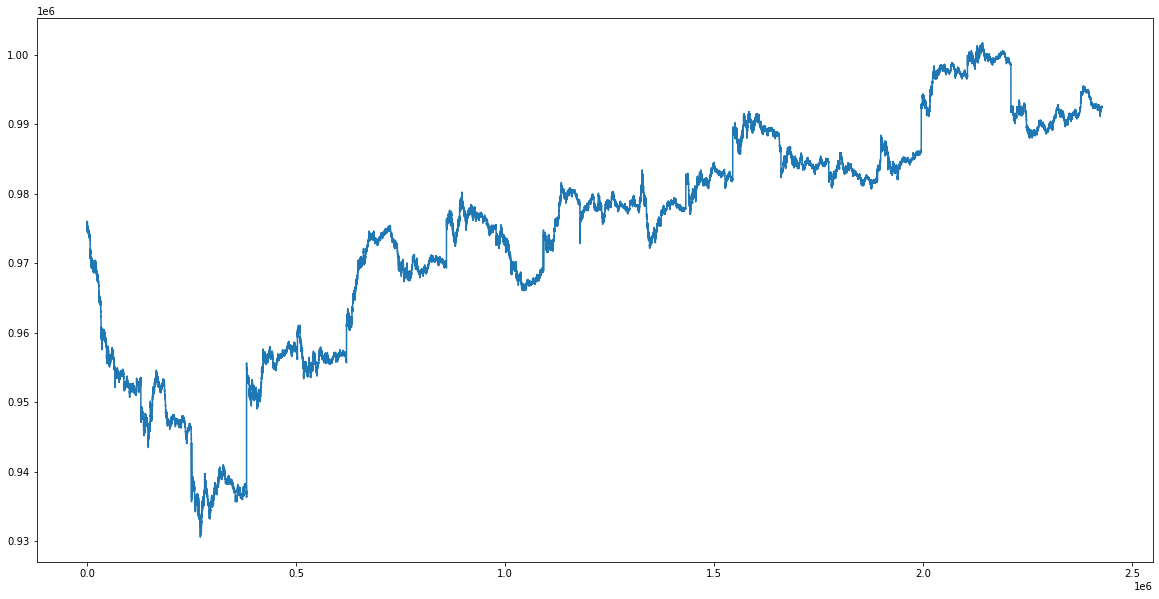

In [146]:
#plot the midQ
plt.figure(figsize=(20,10))
plt.plot(futuresData['midQ'])

### Next, we want to synchronize the two time series

In [147]:
#First, we want to get the common trading days from the two time series

##We first get the trading days from the stock data
stockData_dates = np.unique(stockData.date)
stoD=pd.to_datetime(stockData_dates, format="%Y-%m-%d")
qqqq=stoD.year*10000+stoD.month*100+stoD.day

In [148]:
qqqq

Int64Index([20190102, 20190103, 20190104, 20190107, 20190108, 20190109,
            20190110, 20190111, 20190114, 20190115, 20190116, 20190117,
            20190118, 20190121, 20190122, 20190123, 20190124, 20190125,
            20190128, 20190129, 20190130, 20190211, 20190212, 20190213,
            20190214, 20190215, 20190218, 20190219, 20190220, 20190221,
            20190222, 20190225, 20190226, 20190227, 20190304, 20190305,
            20190306, 20190307, 20190308, 20190311, 20190312, 20190313,
            20190314, 20190315, 20190318, 20190319, 20190320, 20190321,
            20190322, 20190325, 20190326, 20190327, 20190328, 20190329],
           dtype='int64')

In [149]:
len(qqqq)

54

In [150]:
##Next, we get the trading days from the futures data
indexData_dates = np.unique(futuresData.date)
indD=pd.to_datetime(indexData_dates, format="%Y-%m-%d")
pppp=indD.year*10000+indD.month*100+indD.day

In [151]:
len(pppp)

21

In [152]:
##Now, we can get the common days of the two time series
commonDays=pd.to_datetime(pppp.intersection(qqqq),format="%Y%m%d")

In [153]:
commonDays

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30'],
              dtype='datetime64[ns]', freq=None)

In [154]:
len(commonDays)

21

In [155]:
##With common days generated for both stock and futures, we synchronize days first
d_futures=pd.to_datetime(futuresData.date,format="%Y-%m-%d")
futuresData.date=d_futures
futuresData=futuresData[futuresData.date.isin(commonDays)]

d_stock=pd.to_datetime(stockData.date,format="%Y-%m-%d")
stockData.date=d_stock
stockData=stockData[stockData.date.isin(commonDays)]


In [156]:
stockData

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
0,2019-01-02,90000984,22650.0,2390.0,2390,22850,22800,22750,22700,22650,...,250,466,250,273,2392,44,90,216,92,127
1,2019-01-02,90006003,22650.0,10.0,2400,22850,22800,22750,22700,22650,...,246,559,342,332,2974,80,101,212,195,233
2,2019-01-02,90011020,22600.0,38.0,2438,22850,22800,22750,22700,22650,...,246,560,342,331,3060,48,101,231,204,243
3,2019-01-02,90016041,22600.0,35.0,2473,22850,22800,22750,22700,22650,...,246,560,342,332,3043,14,111,231,204,244
4,2019-01-02,90021061,22600.0,21.0,2494,22800,22750,22700,22650,22600,...,560,1343,332,3045,3,123,235,206,244,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,2019-01-30,132439443,22050.0,20.0,35877,22300,22250,22200,22150,22100,...,412,322,657,476,189,416,3657,1331,1828,1038
3155,2019-01-30,132444456,22050.0,47.0,35924,22300,22250,22200,22150,22100,...,412,325,657,477,172,370,3662,1332,1828,1038
3156,2019-01-30,132449469,22050.0,1.0,35925,22300,22250,22200,22150,22100,...,412,325,657,476,172,376,3667,1331,1828,1038
3157,2019-01-30,132454480,22050.0,13.0,35938,22300,22250,22200,22150,22100,...,412,325,657,477,181,366,3668,1331,1828,1038


In [157]:
stockData.tail(5)

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
3154,2019-01-30,132439443,22050.0,20.0,35877,22300,22250,22200,22150,22100,...,412,322,657,476,189,416,3657,1331,1828,1038
3155,2019-01-30,132444456,22050.0,47.0,35924,22300,22250,22200,22150,22100,...,412,325,657,477,172,370,3662,1332,1828,1038
3156,2019-01-30,132449469,22050.0,1.0,35925,22300,22250,22200,22150,22100,...,412,325,657,476,172,376,3667,1331,1828,1038
3157,2019-01-30,132454480,22050.0,13.0,35938,22300,22250,22200,22150,22100,...,412,325,657,477,181,366,3668,1331,1828,1038
3158,2019-01-30,132459494,22100.0,100.0,36038,22300,22250,22200,22150,22100,...,412,325,654,477,84,366,3670,1330,1828,1055


In [158]:
stockData.date[1]

1   2019-01-02
1   2019-01-03
1   2019-01-04
1   2019-01-07
1   2019-01-08
1   2019-01-09
1   2019-01-10
1   2019-01-11
1   2019-01-14
1   2019-01-15
1   2019-01-16
1   2019-01-17
1   2019-01-18
1   2019-01-21
1   2019-01-22
1   2019-01-23
1   2019-01-24
1   2019-01-25
1   2019-01-28
1   2019-01-29
1   2019-01-30
Name: date, dtype: datetime64[ns]

In [159]:
futuresData.date

0         2019-01-02
1         2019-01-02
2         2019-01-02
3         2019-01-02
4         2019-01-02
             ...    
2428163   2019-01-30
2428164   2019-01-30
2428165   2019-01-30
2428166   2019-01-30
2428167   2019-01-30
Name: date, Length: 2428168, dtype: datetime64[ns]

In [160]:
futuresData.time

0           84500050
1           84500066
2           84500089
3           84500109
4           84500116
             ...    
2428163    134459497
2428164    134459623
2428165    134459747
2428166    134459872
2428167    134459998
Name: time, Length: 2428168, dtype: int64

In [161]:
##In order to synchronize trade time, too, we create indexes for both dataframes that have the same format
stockData_DateTime = pd.to_datetime(stockData.date.astype(str) + ' ' + stockData.time.astype(str), format="%Y-%m-%d %H%M%S%f")
futuresData_DateTime = pd.to_datetime(futuresData.date.astype(str) + ' ' + futuresData.time.astype(str), format="%Y-%m-%d %H%M%S%f")

In [162]:
futuresData_DateTime

0         2019-01-02 08:45:00.050
1         2019-01-02 08:45:00.066
2         2019-01-02 08:45:00.089
3         2019-01-02 08:45:00.109
4         2019-01-02 08:45:00.116
                    ...          
2428163   2019-01-30 13:44:59.497
2428164   2019-01-30 13:44:59.623
2428165   2019-01-30 13:44:59.747
2428166   2019-01-30 13:44:59.872
2428167   2019-01-30 13:44:59.998
Length: 2428168, dtype: datetime64[ns]

In [163]:
stockData_DateTime

0      2019-01-02 09:00:00.984
1      2019-01-02 09:00:06.003
2      2019-01-02 09:00:11.020
3      2019-01-02 09:00:16.041
4      2019-01-02 09:00:21.061
                 ...          
3154   2019-01-30 13:24:39.443
3155   2019-01-30 13:24:44.456
3156   2019-01-30 13:24:49.469
3157   2019-01-30 13:24:54.480
3158   2019-01-30 13:24:59.494
Length: 65472, dtype: datetime64[ns]

In [164]:
stockData.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158],
           dtype='int64', length=65472)

In [165]:
##Now, we create indexes of the same format for both the stock data and the index futures data
stockData.index = stockData_DateTime
stockData = stockData[~stockData.index.duplicated(keep='last')]  # 

futuresData.index = futuresData_DateTime
futuresData = futuresData[~futuresData.index.duplicated(keep='last')]

In [166]:
stockData.index

DatetimeIndex(['2019-01-02 09:00:00.984000', '2019-01-02 09:00:06.003000',
               '2019-01-02 09:00:11.020000', '2019-01-02 09:00:16.041000',
               '2019-01-02 09:00:21.061000', '2019-01-02 09:00:26.080000',
               '2019-01-02 09:00:31.099000', '2019-01-02 09:00:36.118000',
               '2019-01-02 09:00:41.135000', '2019-01-02 09:00:46.153000',
               ...
               '2019-01-30 13:24:14.215000', '2019-01-30 13:24:19.413000',
               '2019-01-30 13:24:24.417000', '2019-01-30 13:24:29.424000',
               '2019-01-30 13:24:34.432000', '2019-01-30 13:24:39.443000',
               '2019-01-30 13:24:44.456000', '2019-01-30 13:24:49.469000',
               '2019-01-30 13:24:54.480000', '2019-01-30 13:24:59.494000'],
              dtype='datetime64[ns]', length=65472, freq=None)

In [167]:
futuresData.index

DatetimeIndex(['2019-01-02 08:45:00.050000', '2019-01-02 08:45:00.066000',
               '2019-01-02 08:45:00.089000', '2019-01-02 08:45:00.109000',
               '2019-01-02 08:45:00.116000', '2019-01-02 08:45:00.128000',
               '2019-01-02 08:45:00.146000', '2019-01-02 08:45:00.162000',
               '2019-01-02 08:45:00.179000', '2019-01-02 08:45:00.241000',
               ...
               '2019-01-30 13:44:58.622000', '2019-01-30 13:44:58.747000',
               '2019-01-30 13:44:58.872000', '2019-01-30 13:44:59.247000',
               '2019-01-30 13:44:59.372000', '2019-01-30 13:44:59.497000',
               '2019-01-30 13:44:59.623000', '2019-01-30 13:44:59.747000',
               '2019-01-30 13:44:59.872000', '2019-01-30 13:44:59.998000'],
              dtype='datetime64[ns]', length=2428168, freq=None)

In [168]:
##Now, we synchronize the timestamps of the two time series; here, we downsample the time series with more time stamps
###First, we union the indexes
new_index1=stockData.index.union(futuresData.index)
new_index=np.unique(new_index1)

In [169]:
len(new_index),len(stockData.index),len(futuresData.index),len(new_index)-len(futuresData.index)

(2493259, 65472, 2428168, 65091)

In [170]:
###Next, we insert stock time stamps to index futures data
resampledFuturesData = futuresData.reindex(new_index)

In [171]:
###Let's check the resampled futures data
#resampledFuturesData[np.isnan(resampledFuturesData['time'])]
resampledFuturesData[6805:6855]

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
2019-01-02 09:00:00.741,2019-01-02,90000741.0,973900.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,...,29.0,20.0,10.0,40.0,51.0,50.0,28.0,68.0,TXFA9,973450.0
2019-01-02 09:00:00.866,2019-01-02,90000866.0,973900.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,...,31.0,18.0,51.0,3.0,52.0,50.0,28.0,69.0,TXFA9,973450.0
2019-01-02 09:00:00.984,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 09:00:00.991,2019-01-02,90000991.0,973900.0,973800.0,973700.0,973600.0,973500.0,973300.0,973200.0,973100.0,...,37.0,20.0,53.0,36.0,50.0,29.0,69.0,24.0,TXFA9,973400.0
2019-01-02 09:00:01.116,2019-01-02,90001116.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,973100.0,...,21.0,57.0,9.0,1.0,46.0,32.0,70.0,26.0,TXFA9,973350.0
2019-01-02 09:00:01.241,2019-01-02,90001241.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,973100.0,...,22.0,18.0,58.0,1.0,40.0,32.0,71.0,27.0,TXFA9,973350.0
2019-01-02 09:00:01.366,2019-01-02,90001366.0,973800.0,973700.0,973600.0,973500.0,973400.0,973100.0,973000.0,972900.0,...,22.0,19.0,57.0,30.0,74.0,27.0,31.0,18.0,TXFA9,973250.0
2019-01-02 09:00:01.491,2019-01-02,90001491.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,973100.0,973000.0,...,17.0,61.0,10.0,1.0,18.0,70.0,26.0,30.0,TXFA9,973250.0
2019-01-02 09:00:01.616,2019-01-02,90001616.0,973500.0,973400.0,973300.0,973200.0,973100.0,973000.0,972900.0,972800.0,...,46.0,1.0,1.0,59.0,28.0,30.0,19.0,41.0,TXFA9,973050.0
2019-01-02 09:00:01.741,2019-01-02,90001741.0,973500.0,973400.0,973300.0,973200.0,973100.0,973000.0,972900.0,972800.0,...,20.0,15.0,31.0,8.0,25.0,36.0,21.0,42.0,TXFA9,973050.0


In [172]:
stockData.head(5)

,date,time,lastPx,size,volume,SP5,SP4,SP3,SP2,SP1,...,SV5,SV4,SV3,SV2,SV1,BV1,BV2,BV3,BV4,BV5
2019-01-02 09:00:00.984,2019-01-02,90000984,22650.0,2390.0,2390,22850,22800,22750,22700,22650,...,250,466,250,273,2392,44,90,216,92,127
2019-01-02 09:00:06.003,2019-01-02,90006003,22650.0,10.0,2400,22850,22800,22750,22700,22650,...,246,559,342,332,2974,80,101,212,195,233
2019-01-02 09:00:11.020,2019-01-02,90011020,22600.0,38.0,2438,22850,22800,22750,22700,22650,...,246,560,342,331,3060,48,101,231,204,243
2019-01-02 09:00:16.041,2019-01-02,90016041,22600.0,35.0,2473,22850,22800,22750,22700,22650,...,246,560,342,332,3043,14,111,231,204,244
2019-01-02 09:00:21.061,2019-01-02,90021061,22600.0,21.0,2494,22800,22750,22700,22650,22600,...,560,1343,332,3045,3,123,235,206,244,240


In [173]:
###Then, we forward fill nan's in the index futures data so that date and time will not be nan's
resampledFuturesData.fillna(method='ffill',inplace=True)

In [174]:
resampledFuturesData[6805:6855]

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
2019-01-02 09:00:00.741,2019-01-02,90000741.0,973900.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,...,29.0,20.0,10.0,40.0,51.0,50.0,28.0,68.0,TXFA9,973450.0
2019-01-02 09:00:00.866,2019-01-02,90000866.0,973900.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,...,31.0,18.0,51.0,3.0,52.0,50.0,28.0,69.0,TXFA9,973450.0
2019-01-02 09:00:00.984,2019-01-02,90000866.0,973900.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,...,31.0,18.0,51.0,3.0,52.0,50.0,28.0,69.0,TXFA9,973450.0
2019-01-02 09:00:00.991,2019-01-02,90000991.0,973900.0,973800.0,973700.0,973600.0,973500.0,973300.0,973200.0,973100.0,...,37.0,20.0,53.0,36.0,50.0,29.0,69.0,24.0,TXFA9,973400.0
2019-01-02 09:00:01.116,2019-01-02,90001116.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,973100.0,...,21.0,57.0,9.0,1.0,46.0,32.0,70.0,26.0,TXFA9,973350.0
2019-01-02 09:00:01.241,2019-01-02,90001241.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,973100.0,...,22.0,18.0,58.0,1.0,40.0,32.0,71.0,27.0,TXFA9,973350.0
2019-01-02 09:00:01.366,2019-01-02,90001366.0,973800.0,973700.0,973600.0,973500.0,973400.0,973100.0,973000.0,972900.0,...,22.0,19.0,57.0,30.0,74.0,27.0,31.0,18.0,TXFA9,973250.0
2019-01-02 09:00:01.491,2019-01-02,90001491.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,973100.0,973000.0,...,17.0,61.0,10.0,1.0,18.0,70.0,26.0,30.0,TXFA9,973250.0
2019-01-02 09:00:01.616,2019-01-02,90001616.0,973500.0,973400.0,973300.0,973200.0,973100.0,973000.0,972900.0,972800.0,...,46.0,1.0,1.0,59.0,28.0,30.0,19.0,41.0,TXFA9,973050.0
2019-01-02 09:00:01.741,2019-01-02,90001741.0,973500.0,973400.0,973300.0,973200.0,973100.0,973000.0,972900.0,972800.0,...,20.0,15.0,31.0,8.0,25.0,36.0,21.0,42.0,TXFA9,973050.0


In [175]:
###down sample index data to synchronize with stock data
futuresData_downsampled=resampledFuturesData.loc[stockData.index]

In [176]:
futuresData_downsampled.head(10)

,date,time,askPrice5,askPrice4,askPrice3,askPrice2,askPrice1,bidPrice1,bidPrice2,bidPrice3,...,askSize3,askSize2,askSize1,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,symbol,midQ
2019-01-02 09:00:00.984,2019-01-02,90000866.0,973900.0,973800.0,973700.0,973600.0,973500.0,973400.0,973300.0,973200.0,...,31.0,18.0,51.0,3.0,52.0,50.0,28.0,69.0,TXFA9,973450.0
2019-01-02 09:00:06.003,2019-01-02,90005991.0,973400.0,973300.0,973200.0,973100.0,973000.0,972900.0,972800.0,972700.0,...,20.0,19.0,16.0,1.0,7.0,27.0,25.0,18.0,TXFA9,972950.0
2019-01-02 09:00:11.020,2019-01-02,90010991.0,973200.0,973100.0,973000.0,972900.0,972800.0,972700.0,972600.0,972500.0,...,21.0,15.0,6.0,8.0,22.0,20.0,19.0,21.0,TXFA9,972750.0
2019-01-02 09:00:16.041,2019-01-02,90015991.0,973100.0,973000.0,972900.0,972800.0,972700.0,972600.0,972500.0,972400.0,...,20.0,21.0,14.0,3.0,23.0,23.0,28.0,46.0,TXFA9,972650.0
2019-01-02 09:00:21.061,2019-01-02,90020991.0,973100.0,973000.0,972900.0,972800.0,972700.0,972500.0,972400.0,972300.0,...,28.0,18.0,26.0,11.0,25.0,32.0,46.0,49.0,TXFA9,972600.0
2019-01-02 09:00:26.080,2019-01-02,90025991.0,972500.0,972400.0,972300.0,972200.0,972100.0,972000.0,971900.0,971800.0,...,32.0,26.0,18.0,1.0,18.0,44.0,14.0,22.0,TXFA9,972050.0
2019-01-02 09:00:31.099,2019-01-02,90030991.0,971600.0,971500.0,971400.0,971300.0,971200.0,971100.0,971000.0,970900.0,...,14.0,22.0,4.0,8.0,15.0,11.0,11.0,24.0,TXFA9,971150.0
2019-01-02 09:00:36.118,2019-01-02,90036116.0,971700.0,971600.0,971500.0,971400.0,971300.0,971200.0,971100.0,971000.0,...,17.0,13.0,4.0,1.0,32.0,23.0,12.0,13.0,TXFA9,971250.0
2019-01-02 09:00:41.135,2019-01-02,90041116.0,972000.0,971900.0,971800.0,971700.0,971600.0,971500.0,971400.0,971300.0,...,30.0,20.0,1.0,5.0,28.0,36.0,33.0,36.0,TXFA9,971550.0
2019-01-02 09:00:46.153,2019-01-02,90046116.0,972300.0,972200.0,972100.0,972000.0,971900.0,971800.0,971700.0,971600.0,...,19.0,24.0,5.0,35.0,36.0,29.0,34.0,20.0,TXFA9,971850.0


In [177]:
len(futuresData_downsampled), len(stockData)

(65472, 65472)

In [178]:
###notice the difference between .loc and .iloc for pandas dataframes
###.iloc is for integer index
futuresData_downsampled.iloc[-1]

date         2019-01-30 00:00:00
time                 132458997.0
askPrice5               992700.0
askPrice4               992600.0
askPrice3               992500.0
askPrice2               992400.0
askPrice1               992300.0
bidPrice1               992200.0
bidPrice2               992100.0
bidPrice3               992000.0
bidPrice4               991900.0
bidPrice5               991800.0
askSize5                    87.0
askSize4                    88.0
askSize3                    69.0
askSize2                    85.0
askSize1                    44.0
bidSize1                    29.0
bidSize2                    85.0
bidSize3                   116.0
bidSize4                    70.0
bidSize5                    86.0
symbol                     TXFB9
midQ                    992250.0
Name: 2019-01-30 13:24:59.494000, dtype: object

In [179]:
futuresData_downsampled.index[-1]

Timestamp('2019-01-30 13:24:59.494000')

In [180]:
###.loc is for index itself
futuresData_downsampled.loc[futuresData_downsampled.index[-1]]

date         2019-01-30 00:00:00
time                 132458997.0
askPrice5               992700.0
askPrice4               992600.0
askPrice3               992500.0
askPrice2               992400.0
askPrice1               992300.0
bidPrice1               992200.0
bidPrice2               992100.0
bidPrice3               992000.0
bidPrice4               991900.0
bidPrice5               991800.0
askSize5                    87.0
askSize4                    88.0
askSize3                    69.0
askSize2                    85.0
askSize1                    44.0
bidSize1                    29.0
bidSize2                    85.0
bidSize3                   116.0
bidSize4                    70.0
bidSize5                    86.0
symbol                     TXFB9
midQ                    992250.0
Name: 2019-01-30 13:24:59.494000, dtype: object

In [181]:
futuresData_downsampled['midQ']

2019-01-02 09:00:00.984    973450.0
2019-01-02 09:00:06.003    972950.0
2019-01-02 09:00:11.020    972750.0
2019-01-02 09:00:16.041    972650.0
2019-01-02 09:00:21.061    972600.0
                             ...   
2019-01-30 13:24:39.443    992250.0
2019-01-30 13:24:44.456    992250.0
2019-01-30 13:24:49.469    992250.0
2019-01-30 13:24:54.480    992250.0
2019-01-30 13:24:59.494    992250.0
Name: midQ, Length: 65472, dtype: float64

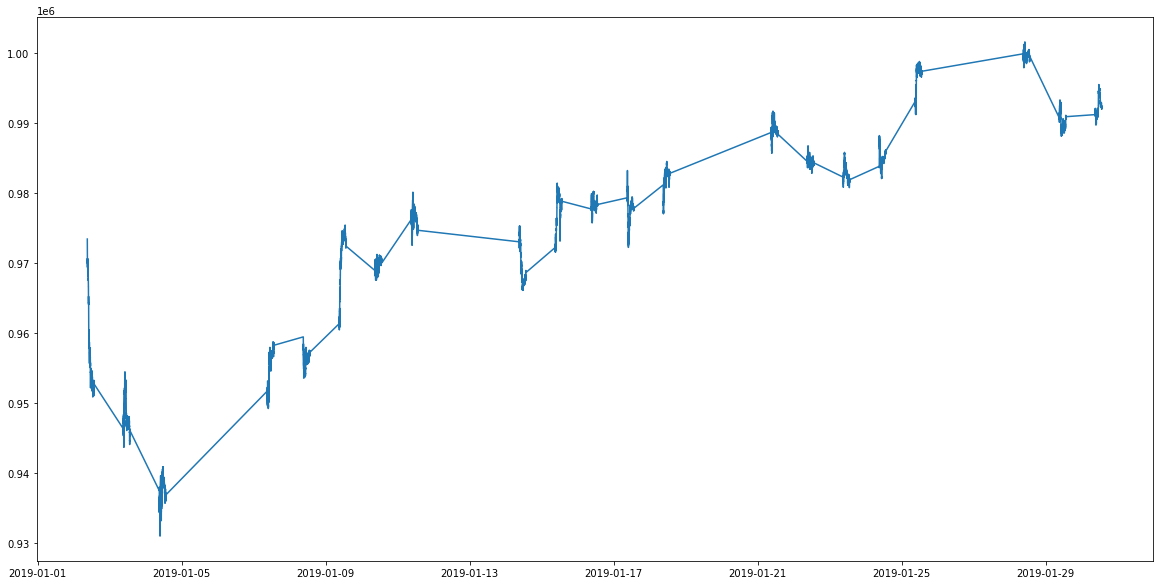

In [182]:
###Let's plot the futures midQuote again
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,10))
#plt.plot(futuresData_downsampled.index,futuresData_downsampled['midQ'])
plt.plot(futuresData_downsampled['midQ'])

### Let's move to the analysis of leading-lagging effects of index futures on single stock returns
#### First, we want to define a few "labels", which are "point-to-point" returns of mid quotes of the stock, as well as a few "features", which are "point-to-point" returns of mid quotes of index futures:

In [183]:
#define the columns of the dataframe that holds both features and labels
basicCols = ['date', 'time', 'sAskPrice1','sBidPrice1','sMidQ', 'fAskPrice1','fBidPrice1', 'fMidQ']
featureCols = []
labelCols = []

for i in range(10, 110, 10):
    basicCols.extend(['fLaggingRtn_{}'.format(str(i))])
    featureCols.extend(['fLaggingRtn_{}'.format(str(i))])
for i in range(10, 110, 10):
    basicCols.extend(['sForwardRtn_{}'.format(str(i))])
    labelCols.extend(['sForwardRtn_{}'.format(str(i))])

In [184]:
featureCols

['fLaggingRtn_10',
 'fLaggingRtn_20',
 'fLaggingRtn_30',
 'fLaggingRtn_40',
 'fLaggingRtn_50',
 'fLaggingRtn_60',
 'fLaggingRtn_70',
 'fLaggingRtn_80',
 'fLaggingRtn_90',
 'fLaggingRtn_100']

In [185]:
#define the pandas dataframe
df = pd.DataFrame(columns=basicCols)

In [186]:
df

,date,time,sAskPrice1,sBidPrice1,sMidQ,fAskPrice1,fBidPrice1,fMidQ,fLaggingRtn_10,fLaggingRtn_20,...,sForwardRtn_10,sForwardRtn_20,sForwardRtn_30,sForwardRtn_40,sForwardRtn_50,sForwardRtn_60,sForwardRtn_70,sForwardRtn_80,sForwardRtn_90,sForwardRtn_100


In [187]:
#Populate df with basic data
df['date']=stockData['date']
df['time']=stockData['time']
df['sAskPrice1']=stockData['SP1']
df['sBidPrice1']=stockData['BP1']
df['sMidQ']=(stockData['SP1'] + stockData['BP1'])/2
df['fAskPrice1']=futuresData_downsampled['askPrice1']
df['fBidPrice1']=futuresData_downsampled['bidPrice1']
df['fMidQ']=futuresData_downsampled['midQ']

In [188]:
df

,date,time,sAskPrice1,sBidPrice1,sMidQ,fAskPrice1,fBidPrice1,fMidQ,fLaggingRtn_10,fLaggingRtn_20,...,sForwardRtn_10,sForwardRtn_20,sForwardRtn_30,sForwardRtn_40,sForwardRtn_50,sForwardRtn_60,sForwardRtn_70,sForwardRtn_80,sForwardRtn_90,sForwardRtn_100
2019-01-02 09:00:00.984,2019-01-02,90000984,22650,22600,22625.0,973500.0,973400.0,973450.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 09:00:06.003,2019-01-02,90006003,22650,22600,22625.0,973000.0,972900.0,972950.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 09:00:11.020,2019-01-02,90011020,22650,22600,22625.0,972800.0,972700.0,972750.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 09:00:16.041,2019-01-02,90016041,22650,22600,22625.0,972700.0,972600.0,972650.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 09:00:21.061,2019-01-02,90021061,22600,22550,22575.0,972700.0,972500.0,972600.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-30 13:24:39.443,2019-01-30,132439443,22100,22050,22075.0,992300.0,992200.0,992250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30 13:24:44.456,2019-01-30,132444456,22100,22050,22075.0,992300.0,992200.0,992250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30 13:24:49.469,2019-01-30,132449469,22100,22050,22075.0,992300.0,992200.0,992250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30 13:24:54.480,2019-01-30,132454480,22100,22050,22075.0,992300.0,992200.0,992250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
#we calculate forward return of stocks and lagging returns of futures
for i in range(10, 110, 10):
    df['sForwardRtn_{}'.format(str(i))]=df.groupby('date')['sMidQ'].shift(-i) / df['sMidQ'].shift(0) - 1
    df['fLaggingRtn_{}'.format(str(i))]=df['fMidQ'].shift(0) / df.groupby('date')['fMidQ'].shift(i) - 1
    
    #fillna
    df['sForwardRtn_{}'.format(str(i))].fillna(0, inplace=True)  # you can also drop, but here we want to keep the data
    df['fLaggingRtn_{}'.format(str(i))].fillna(0, inplace=True)
    

In [190]:
df

,date,time,sAskPrice1,sBidPrice1,sMidQ,fAskPrice1,fBidPrice1,fMidQ,fLaggingRtn_10,fLaggingRtn_20,...,sForwardRtn_10,sForwardRtn_20,sForwardRtn_30,sForwardRtn_40,sForwardRtn_50,sForwardRtn_60,sForwardRtn_70,sForwardRtn_80,sForwardRtn_90,sForwardRtn_100
2019-01-02 09:00:00.984,2019-01-02,90000984,22650,22600,22625.0,973500.0,973400.0,973450.0,0.0,0.000000,...,-0.00221,-0.00221,-0.00221,-0.00221,-0.00221,-0.002210,-0.004420,-0.004420,-0.004420,-0.004420
2019-01-02 09:00:06.003,2019-01-02,90006003,22650,22600,22625.0,973000.0,972900.0,972950.0,0.0,0.000000,...,-0.00221,-0.00221,-0.00221,-0.00221,-0.00221,-0.002210,-0.004420,-0.004420,-0.004420,-0.004420
2019-01-02 09:00:11.020,2019-01-02,90011020,22650,22600,22625.0,972800.0,972700.0,972750.0,0.0,0.000000,...,-0.00221,-0.00221,-0.00221,-0.00221,-0.00221,-0.002210,-0.004420,-0.004420,-0.004420,-0.004420
2019-01-02 09:00:16.041,2019-01-02,90016041,22650,22600,22625.0,972700.0,972600.0,972650.0,0.0,0.000000,...,-0.00221,-0.00221,-0.00221,-0.00221,-0.00221,-0.002210,-0.004420,-0.004420,-0.004420,-0.004420
2019-01-02 09:00:21.061,2019-01-02,90021061,22600,22550,22575.0,972700.0,972500.0,972600.0,0.0,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.00000,-0.002215,-0.002215,-0.002215,-0.002215,-0.002215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-30 13:24:39.443,2019-01-30,132439443,22100,22050,22075.0,992300.0,992200.0,992250.0,0.0,0.000202,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-30 13:24:44.456,2019-01-30,132444456,22100,22050,22075.0,992300.0,992200.0,992250.0,0.0,0.000202,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-30 13:24:49.469,2019-01-30,132449469,22100,22050,22075.0,992300.0,992200.0,992250.0,0.0,0.000202,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-30 13:24:54.480,2019-01-30,132454480,22100,22050,22075.0,992300.0,992200.0,992250.0,0.0,0.000202,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [191]:
#We can double check and see if the "shift" is only done to the same trading day
df.to_csv("df.csv")

### Since we have prepared both the feature and the labels data, we can now move to the next step of building the models using features to forecast labels.

In [192]:
#To study leading/lagging effects, we import skilearn
from sklearn import linear_model

In [193]:
#Next, we create a bunch of linear regression models to study index futures leading/lagging effects
linearR_Models = {}
for i in range(10, 110, 10):
    linearR_Models['model_{}'.format(str(i))] = linear_model.LinearRegression(fit_intercept=True)

In [194]:
#Furthermore, we create a dataframe to hold the regression R2
r2Cols = ['date']
r2Cols.extend(labelCols)
r2InSample = pd.DataFrame(columns=r2Cols)

In [195]:
#Now, we iterate through all days and conduct leading/lagging effect analysis for each day

##But first, we need to get all days
allDays = stockData.date
date_index=np.unique(allDays)

In [196]:
len(date_index)

21

In [197]:
##Now we iterate through days
for i in range(len(date_index)):
    ###Get thisday's data
    df_forThisDay = df[df.date == date_index[i]]
    
    ###extract feature columns
    features = pd.DataFrame(columns=featureCols)
    for j in range(10, 110, 10):
        features['fLaggingRtn_{}'.format(str(j))] = df_forThisDay['fLaggingRtn_{}'.format(str(j))]
        
    ###prepare labels
    labels = pd.DataFrame(columns=['label'])

    ###prepare R2Insample stats for output purpose
    oneLineData = [np.datetime_as_string(date_index[i]).split('T')[0]]

    ###iterate through all labels and do linear regression
    for k in range(10, 110, 10):
        ####Get data for this specific label
        labels['label'] = df_forThisDay['sForwardRtn_{}'.format(str(k))]

        ####using the specific model to fit the data
        linearR_Models['model_{}'.format(str(k))].fit(features, labels)
        
        ####get the in sample R2
        inSampleR2 = linearR_Models['model_{}'.format(str(k))].score(features, labels)
        
        ####record the insample r2
        oneLineData.extend([linearR_Models['model_{}'.format(str(k))].score(features, labels)])

        ####some monitoring tool
        print(str(date_index[i]) + ', model_{}'.format(str(k)) + "," + str(inSampleR2))
        
    ###Finally, append this day's data to the overall data frame    
    r2InSample = pd.concat([r2InSample, pd.DataFrame(data = [oneLineData], columns=r2Cols)])

2019-01-02T00:00:00.000000000, model_10,0.061330850488606314
2019-01-02T00:00:00.000000000, model_20,0.08395516833645023
2019-01-02T00:00:00.000000000, model_30,0.08433897638518162
2019-01-02T00:00:00.000000000, model_40,0.07612809932136433
2019-01-02T00:00:00.000000000, model_50,0.07219549411409998
2019-01-02T00:00:00.000000000, model_60,0.05647095691656412
2019-01-02T00:00:00.000000000, model_70,0.045763242226530276
2019-01-02T00:00:00.000000000, model_80,0.034519697473365696
2019-01-02T00:00:00.000000000, model_90,0.027966501911191433
2019-01-02T00:00:00.000000000, model_100,0.020907427099300158
2019-01-03T00:00:00.000000000, model_10,0.04038349168305355
2019-01-03T00:00:00.000000000, model_20,0.06948027129026868
2019-01-03T00:00:00.000000000, model_30,0.0981424306777714
2019-01-03T00:00:00.000000000, model_40,0.11806707033911912
2019-01-03T00:00:00.000000000, model_50,0.11582690487295433
2019-01-03T00:00:00.000000000, model_60,0.12347567456727215
2019-01-03T00:00:00.000000000, mode

In [198]:
r2InSample.set_index(r2InSample.date, inplace=True)
del r2InSample['date']

In [199]:
r2InSample

,sForwardRtn_10,sForwardRtn_20,sForwardRtn_30,sForwardRtn_40,sForwardRtn_50,sForwardRtn_60,sForwardRtn_70,sForwardRtn_80,sForwardRtn_90,sForwardRtn_100
date,,,,,,,,,,
2019-01-02,0.061331,0.083955,0.084339,0.076128,0.072195,0.056471,0.045763,0.034520,0.027967,0.020907
2019-01-03,0.040383,0.069480,0.098142,0.118067,0.115827,0.123476,0.141075,0.145032,0.143422,0.155572
2019-01-04,0.058952,0.063216,0.054743,0.054572,0.059299,0.057675,0.050667,0.052376,0.045407,0.041146
2019-01-07,0.046032,0.047571,0.042801,0.054095,0.051513,0.037093,0.037990,0.050428,0.056977,0.056725
2019-01-08,0.076282,0.073099,0.073894,0.080603,0.067210,0.064656,0.056130,0.048000,0.041342,0.037296
2019-01-09,0.108481,0.061028,0.037262,0.044459,0.045910,0.032204,0.026411,0.030152,0.021005,0.016937
2019-01-10,0.042844,0.059824,0.067550,0.070404,0.049010,0.020976,0.016296,0.028987,0.050472,0.053819
2019-01-11,0.115047,0.145948,0.131833,0.133819,0.110908,0.077169,0.064286,0.047365,0.058704,0.080631
2019-01-14,0.027014,0.035541,0.031581,0.028543,0.035221,0.043243,0.052529,0.050844,0.046427,0.042872


<AxesSubplot:ylabel='date'>

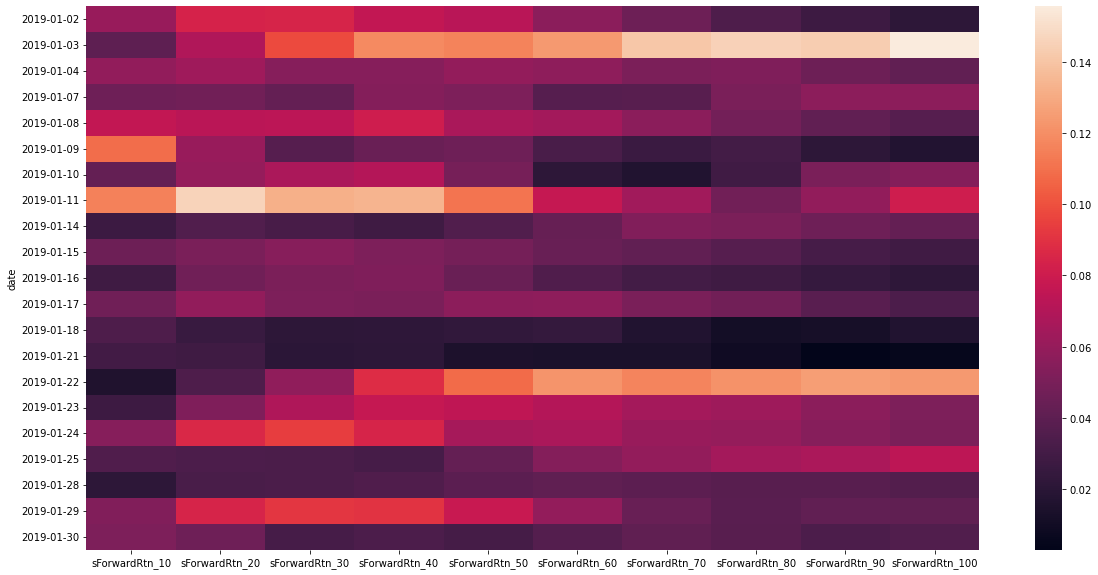

In [200]:
###Now, let's plot a heatmap for it
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(r2InSample)